In [1]:
import cpm
import matplotlib.pyplot as plt
import random
import time
import pandas as pd
import numpy as np

## Sorting Simulations

In [3]:
def create_sorting_simulation(dimension):
    number_of_types = 3
    temperature = 10
    
    simulation = cpm.Cpm(dimension, number_of_types, temperature)
    
    simulation.set_constraints(cell_type = 1, lambda_area = 20, target_area = 40)
    simulation.set_constraints(cell_type = 1, other_cell_type = 1, adhesion = 14)
    simulation.set_constraints(cell_type = 0, other_cell_type = 1, adhesion = 16)
    
    simulation.set_constraints(cell_type = 2, lambda_area = 20, target_area = 40)
    simulation.set_constraints(cell_type = 2, other_cell_type = 2, adhesion = 2)
    simulation.set_constraints(cell_type = 2, other_cell_type = 1, adhesion = 11)
    simulation.set_constraints(cell_type = 2, other_cell_type = 0, adhesion = 16)

    radius = dimension/3 / 2
    center = dimension/2

    cellPerType = (dimension//256)*(dimension//256) * 500 // 4

    state = simulation.get_state()
    for t in [1,2]:
        for i in range(cellPerType):
            while True:
                x = random.randint(0,dimension-1)
                y = random.randint(0,dimension-1)
                distance_squared = (x-center)**2 + (y-center)**2
                if distance_squared < radius**2 and state[x,y] == 0:
                    simulation.add_cell(x,y,t)
                    break
    return simulation

In [21]:
sim = create_sorting_simulation(512)

In [22]:
state = sim.get_state()

In [23]:
burnin = 30
sim.run(burnin)
sim.set_constraints(cell_type = 1, lambda_area = 1, target_area = 40)
sim.set_constraints(cell_type = 2, lambda_area = 1, target_area = 40)

In [ ]:
offsets = [[-1, -1], [-1, 0], [-1, 1], [0,-1], [0, 1], [1, -1], [1, 0], [1, 1]]
def (ids, types):
    i,t = ids, types
    hetrogenous_border = 0
    light_border = 0
    dark_border = 0
    light_outer = 0
    dark_outer = 0

    for offset in offsets:
        shifted_ids = np.roll(i, offset, (0,1))
        shifted_type = np.roll(t, offset, (0,1))

        hetrogenous_border += np.sum(np.logical_and(t == 2, shifted_type == 1))
        hetrogenous_border += np.sum(np.logical_and(t == 1, shifted_type == 2))

        mask = i != shifted_ids
        light_border += np.sum(np.logical_and(t[mask] == 1, shifted_type[mask] == 1))
        dark_border += np.sum(np.logical_and(t[mask] == 2, shifted_type[mask] == 2))

        light_outer += np.sum(np.logical_and(t == 1, shifted_type == 0))
        light_outer += np.sum(np.logical_and(t == 0, shifted_type == 1))

        dark_outer += np.sum(np.logical_and(t == 2, shifted_type == 0))
        dark_outer += np.sum(np.logical_and(t == 0, shifted_type == 2))
    total_border = hetrogenous_border + light_border + dark_border + light_outer + dark_outer
    dl_border = hetrogenous_border/float(total_border)
    l_border = light_border/float(total_border)
    d_border= dark_border/float(total_border)
    return dl_border, l_border, d_border

In [ ]:
timecodes = []
for i in range(1000000):
    if (i % 1 == 0 and i < 200) or (i%10 == 0 and i < 2000) or (i%100 == 0 and i < 20000) or (i %1000 == 0):
        timecodes.append(i)

In [ ]:
last = None
for i in timecodes:
    if last:
        steps = i - last
        sim.run(steps)

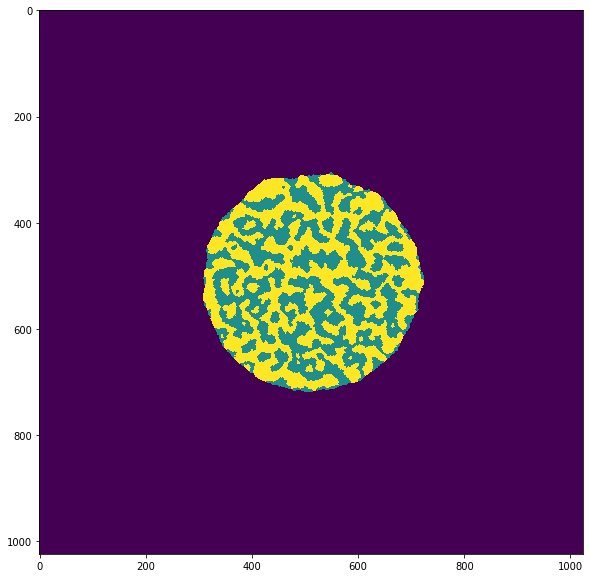

In [17]:
plt.figure(figsize=(10,10))
plt.imshow(state)

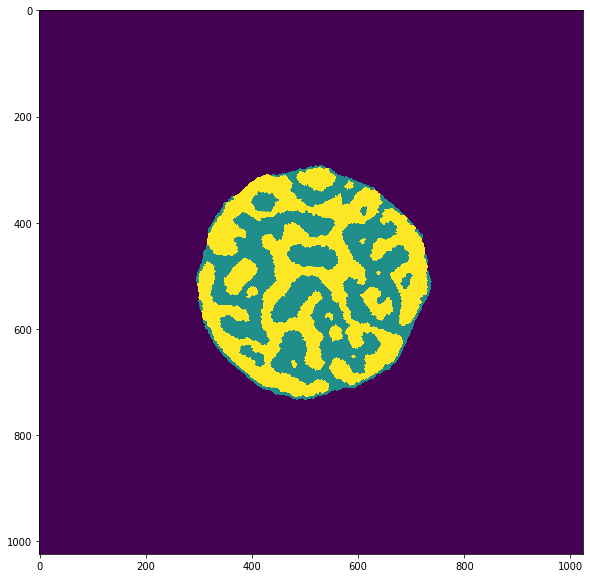

In [20]:
plt.figure(figsize=(10,10))
plt.imshow(state)

# Sorting sim for performance

In [2]:
def create_sorting_simulation(dimension, cell_fraction):
    number_of_types = 3
    temperature = 10
    
    simulation = cpm.Cpm(dimension, number_of_types, temperature)
    
    simulation.set_constraints(cell_type = 1, lambda_area = 20, target_area = 40)
    simulation.set_constraints(cell_type = 1, other_cell_type = 1, adhesion = 14)
    simulation.set_constraints(cell_type = 0, other_cell_type = 1, adhesion = 16)
    
    simulation.set_constraints(cell_type = 2, lambda_area = 20, target_area = 40)
    simulation.set_constraints(cell_type = 2, other_cell_type = 2, adhesion = 2)
    simulation.set_constraints(cell_type = 2, other_cell_type = 1, adhesion = 11)
    simulation.set_constraints(cell_type = 2, other_cell_type = 0, adhesion = 16)

    radius = dimension/3 / 2
    center = dimension/2

    cellPerType = int((dimension//128)**2 /4 * 860 * cell_fraction)

    state = simulation.get_state()
    for t in [1,2]:
        for i in range(cellPerType):
            while True:
                x = random.randint(0,dimension-1)
                y = random.randint(0,dimension-1)
                if state[x,y] == 0:
                    simulation.add_cell(x,y,t)
                    break
    return simulation

In [ ]:
df = pd.DataFrame(columns=["time", "dimension"])
runs = 3
for r in range(runs):
    for i in range(4):
        dimension = 128 * 2**i
        print(dimension)
        sim = create_sorting_simulation(dimension, 1.0)
        start = time.time()
        sim.run(1000)
        end = time.time()
        print(end - start)
        df = df.append({'time':end-start, 'dimension': dimension}, ignore_index=True)

2048


In [70]:
df

,time,dimension
0,2.713897,128.0
1,11.346604,256.0
2,71.053515,512.0
3,448.317816,1024.0
4,2.303191,128.0
5,10.998744,256.0
6,88.475201,512.0
7,496.353148,1024.0
8,2.274506,128.0
9,10.317478,256.0


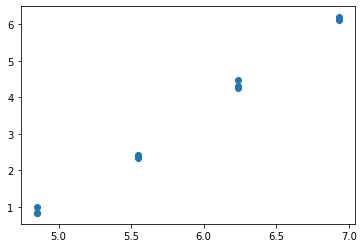

In [75]:
plt.scatter(np.log(df.dimension), np.log(df.time))

In [7]:
df = pd.DataFrame(columns=["time", "cell_fraction"])
runs = 3
for r in range(runs):
    for i in [0.005, 0.01, 0.05, 0.1, 0.5, 1.]:
        dimension = 256
        sim = create_sorting_simulation(dimension, i)
        start = time.time()
        sim.run(1000)
        end = time.time()
        print(end - start)
        df = df.append({'time':end-start, 'cell_fraction': i, 'dimension': dimension}, ignore_index=True)

0.09637808799743652
0.1217961311340332
0.6166491508483887
1.953326940536499
7.172358751296997
10.050351858139038


Text(0.5, 1.0, '256')

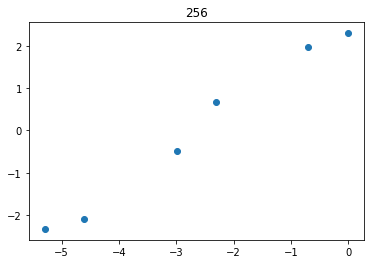

In [9]:
plt.scatter(np.log(df.cell_fraction), np.log(df.time))
plt.title("256")